**Задание**

Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения.
Домашнее задание включает выполнение следующих шагов:
1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе
выбранного набора данных студент должен построить модели машинного обучения для решения
или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания
структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков.
Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество
моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о
возможности построения моделей машинного обучения. В зависимости от набора данных,
порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух
метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.
Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть
ансамблевой.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров.
Производится обучение моделей на основе обучающей выборки и оценка качества моделей на
основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2
гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от
используемой библиотеки можно применять функцию GridSearchCV, использовать перебор
параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение
качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

# **1)Поиск и выбор набора данных для построения моделей машинного обучения.**


Выбранный набор данных содержит данные для прогнозирования приема выпускников.

https://www.kaggle.com/mohansacharya/graduate-admissions


Колонки датасета:
* GRE Scores        -         Результаты GRE
* TOEFL Scores      - Результаты TOEFL
* University Rating   - Университетский рейтинг
* Statement of Purpose and Letter of Recommendation Strength - Заявление о цели и рекомендательное письмо
* Undergraduate GPA  - Бакалавриат GPA
* Research Experience  - Исследовательский опыт 
* SOP - балл по тестированию SOP 
* LOR - балл по тестированию LOR
* Sex - пол кандидата
* Chance of Admit  - Шансы на поступление (целевой параметр)

Для данного набора необходимо решить следующую задачу регресссии: 

* Определение шансов на поступление кандидата по результатам его тестирований.


**Импорт библиотек**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as pltl
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go
# Models
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

**Загрузка данных**

In [0]:
data1 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/ММО/ДЗ1/Admission_Edited.xlsx')
data1 = pd.DataFrame(data = data1)

# **2) Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.**

In [0]:
data1.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Sex
0,1,337,118,4,4.5,4.5,9.65,1,0.92,F
1,2,324,107,4,4.0,4.5,8.87,1,0.76,M
2,3,316,104,3,3.0,3.5,8.00,1,0.72,M
3,4,322,110,3,3.5,2.5,8.67,1,0.80,F
4,5,314,103,2,2.0,3.0,8.21,0,0.65,F


In [0]:
# Размер датасета - 500 наблюдений и 10 переменных
data1.shape

(500, 10)

In [0]:
data1.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
Sex                   object
dtype: object

In [0]:
data1.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
Sex                  9
dtype: int64

Поле `Sex` относится к типу `object`, тогда как все остальные поля относятся к численным типам данных. Также, поле `Sex` содержит 9 пропусков, в отличии от остальных перменных, не имеющих пустых значений.

In [0]:
# Необходимо выполнить следующие замены: 
# f -> F
# m -> M
# Стратегия для замены пропусков - most_frequent
data1['Sex'].unique()

array(['F', 'M', nan, 'f', 'm'], dtype=object)

In [0]:
sexColumn = data1[['Sex']]
imp_num = SimpleImputer(strategy='most_frequent')
imp1 = SimpleImputer(missing_values='f', strategy='constant', fill_value='F')
imp2 = SimpleImputer(missing_values='m', strategy='constant', fill_value='M')
withoutNAN = imp_num.fit_transform(sexColumn)
newData1 = imp1.fit_transform(withoutNAN)
newData2 = imp2.fit_transform(newData1)
data1['Sex'] = newData2
data1['Sex'].unique()

array(['F', 'M'], dtype=object)

In [0]:
data1.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
Sex                  0
dtype: int64

In [0]:
strippedCols = dict()
for name in data1.columns:
  strippedCols[name] = name.strip() 
data1 = data1.rename(strippedCols, axis='columns', errors='raise')
data1.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Вывод:** в выбранном наборе данных содержались пропуски в наблюдениях одной переменной. Пропуски были заменены со стратегией `most _frequent`, все категориальные значения были приведены к общему виду. Лишние пробелы в названиях переменных были убраны.

Построим графики для понимания структуры данных

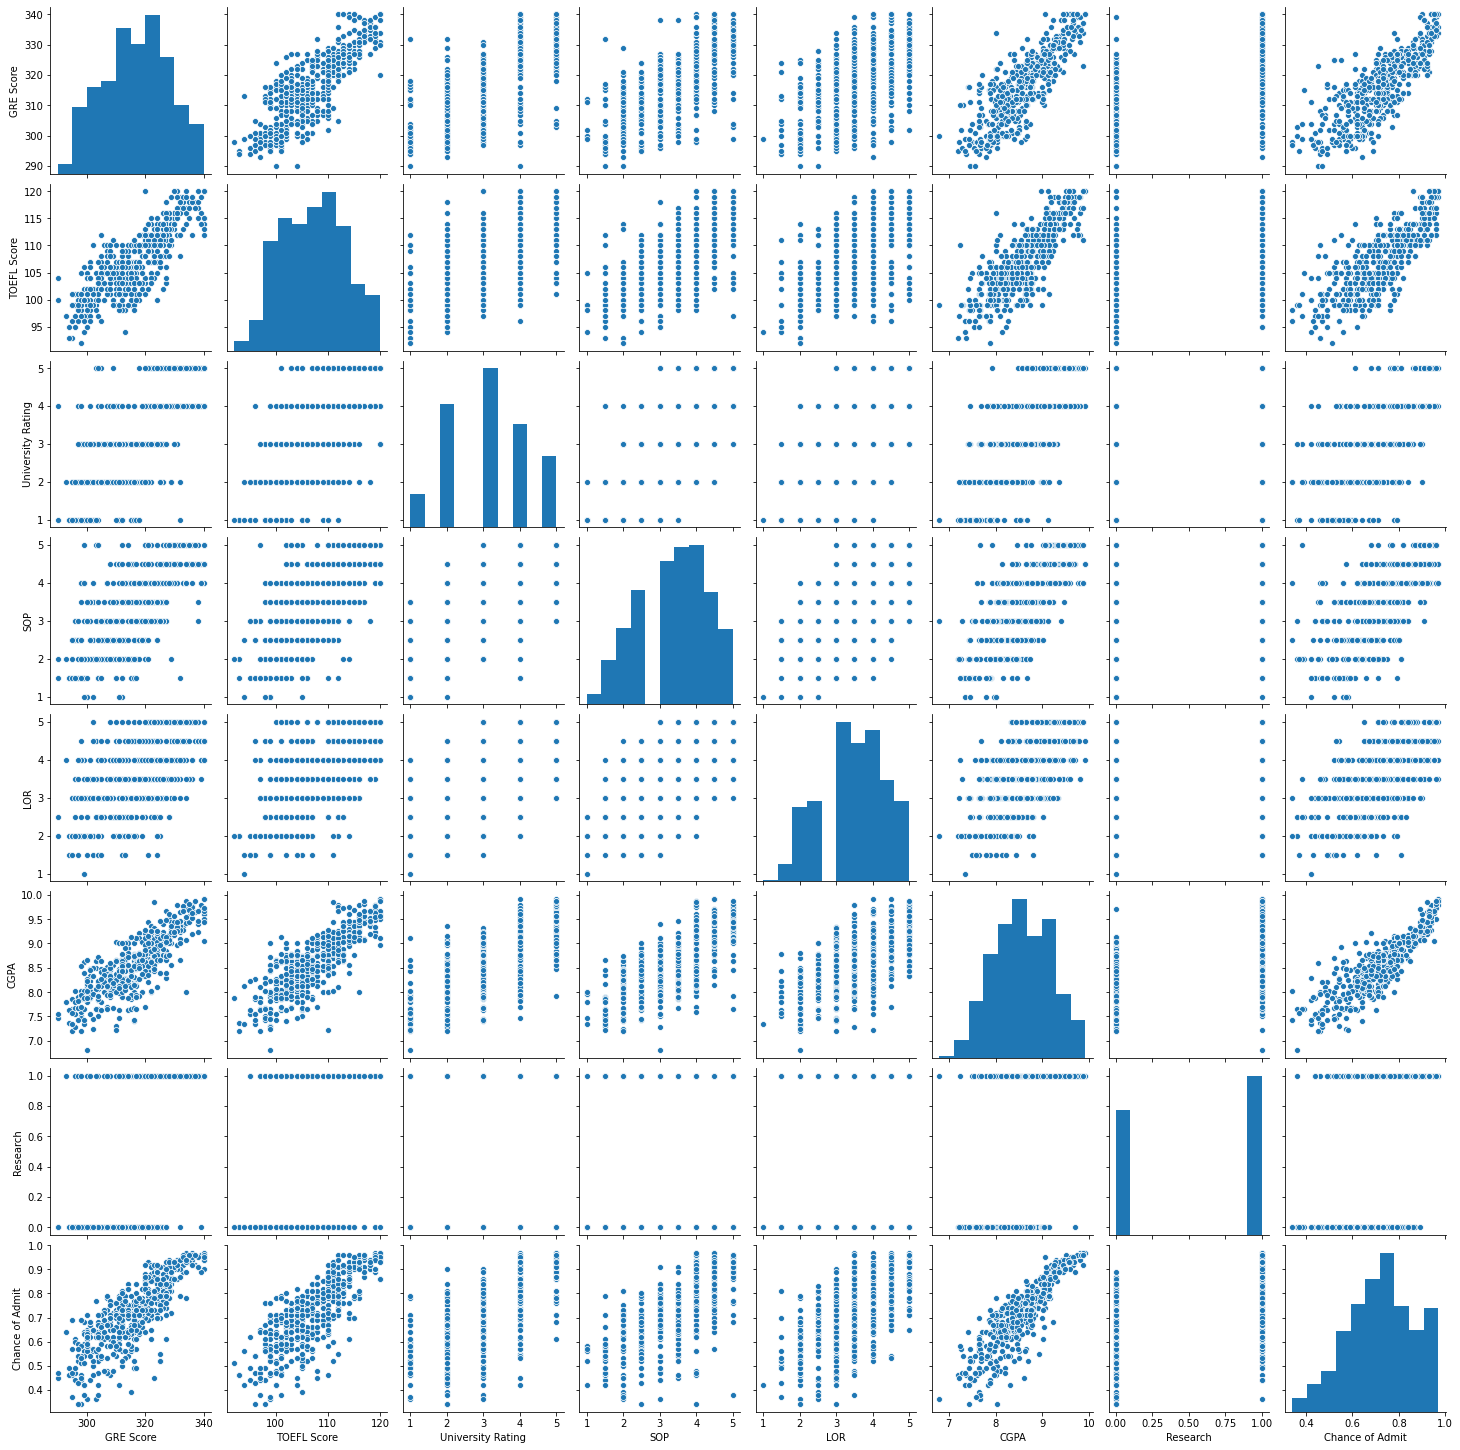

In [0]:
# Парные диаграммы
sns.pairplot(data1[data1.columns[1:]])

# **3) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.**

In [0]:
data1.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
Sex                   object
dtype: object

Все признаки, за исключением `Sex`, являются числовыми признаками. Признак `Sex` необходимо привести к числовому виду с помощью LabelEncoder.

Признак `Serial No.` отвечает за порядковый номер кандидата в списке и не несет никакой полезной информативности, поэтому имеет смысл отказаться от него. Остальные признаки необходимы для построения моделей.

Также необходимо осуществить масштабирование признаков.

In [0]:
data1 = data1[data1.columns[1:]]

In [0]:
data1['Sex'].unique()

array(['F', 'M'], dtype=object)

In [0]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data1['Sex'])
data1['Sex'] = cat_enc_le
data1['Sex'].unique()

array([0, 1])

Таким образом, был осуществлен перевод категориального признака в числовой. 

* F -> 0
* M -> 1

In [0]:
# Масштабирование данных
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data1)
data1 = pd.DataFrame( data = sc1_data, columns=data1.columns)
data1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Sex
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635,0.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159,0.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063,0.0


# **4) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.**

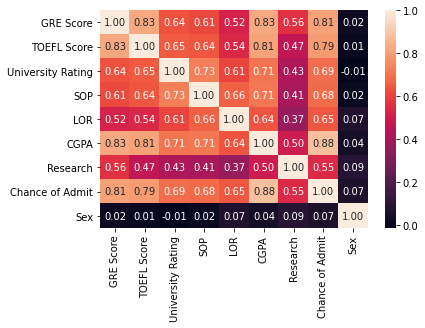

In [0]:
sns.heatmap(data2.corr(), annot=True, fmt='.2f')

Исходя из результатов корреляционного анализа, можно сделать вывод: в наибольшей линейной зависимости от целевой переменной (`Chance of Admit`) находится `CGPA`, тогда как `GRE Score` и  `TOEFL Score` находятся в чуть меньшей. Далее рассмотрим зависимости этих переменных более подробно. 

Пол кандидата (переменная `Sex`) имеет крайне низкие коэффициенты корреляции со всеми переменными, поэтому имеет смысл отказаться от нее в далнейшем анализе. 

In [0]:
data1 = data1.drop(['Sex'], axis=1)

In [0]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Scatter(x=data1['Chance of Admit'], y=data1['CGPA'],  mode='markers'), 
                row=1, 
                col=1)

fig.add_trace(go.Scatter(x= data1['Chance of Admit'], y=  data1['GRE Score'],  mode='markers'), 
                row=1, 
                col=2)

fig.add_trace(go.Scatter(x=data1['Chance of Admit'], y=  data1['TOEFL Score'],  mode='markers'), 
                row=1, 
                col=3)

fig.update_xaxes(title_text="Chance of Admit", row=1, col=1)
fig.update_yaxes(title_text="CGPA", row=1, col=1)

fig.update_xaxes(title_text="Chance of Admit", row=1, col=2)
fig.update_yaxes(title_text="GRE Score", row=1, col=2)

fig.update_xaxes(title_text="Chance of Admit", row=1, col=3)
fig.update_yaxes(title_text="TOEFL Score", row=1, col=3)

fig.show()

Графики распределения показали, следующее:
*  Чем выше значение CGPA у кандидата, тем больший шанс он имеет на зачисление. Имеются выбросы: некоторые кандидаты с высоким значением CGPA имеют те же шансы на поступление, что и у кандидатов с более низким значением. Однако у кандидатов с шансами на поступление >0.8, подобных выбросов не наблюдается. На графике отчетливо видна высокая кучность распределения.
*  Высокое значение GRE Score, увеличивает шансы кандидата на зачисление, однако есть кандидаты, имеющие один и тот же балл GRE Score, но имеют разные шансы на поступление. Например, отчетливо наблюдается разброс в пределах 320 -330 GRE Score. Кандидаты в этом диапазоне имеют шансы на поступление как <0.6 так и >0.8. Несмотря на это, все равно наблюдается линейная зависимость.
* Исходя из построенных графиков распределения, можно сказать, что шансы на поступление слабее зависят от переменной TOEFL_Score, чем от других. Немногие кандидаты, которые имеют значения в переменной TOEFL_Score >115, имеют одинаково высокий шанс на поступление. Зачастую, кандидаты набирают одинаковое количество баллов TOEFL_Score, но при этом имеют разные шансы на поступление. Это являение выражается множеством горизонтальных групп на графике распределения.

**Вывод:**: Для построения моделей машинного обучения, следует обратить внимание на переменные `CGPA`,  `GRE_Score`, `TOEFL_Score`

# **5) Выбор метрик для последующей оценки качества моделей.**


**1. Mean absolute error - средняя абсолютная ошибка**

In [0]:
from sklearn.metrics import mean_absolute_error

**2. Mean squared error - средняя квадратичная ошибка**

In [0]:
from sklearn.metrics import mean_squared_error

**3. Метрика R2 или коэффициент детерминации**


In [0]:
from sklearn.metrics import r2_score 

**Методы вывода метрик**

In [0]:
# Метод оценки качества модели регрессии
def regressionMetrics(y_test, y_predicted):
  MSE =  mean_squared_error(y_test, y_predicted)
  MAE = mean_absolute_error(y_test, y_predicted)
  R2 = r2_score(y_true=np.array(y_test), y_pred=y_predicted )
  print('MSE: \t', MSE)
  print('MAE: \t', MAE)
  print('R2: \t', R2)
  return { 'MSE': MSE, 'MAE': MAE, 'R2': R2 }

# Метод визуализации для сравнения качества моделей
def modelsReference(modelName, BestModelsMetrics, BaseLineModelMetrics):
  fig, ax0 = plt.subplots()

  modelMetrics = ['MAE', 'MSE', 'R2']
  b_m = BaseLineModelMetrics[modelName]
  o_m = BestModelsMetrics[modelName] 
  BaseLine = []
  Optimal = []
  x = np.arange(len(modelMetrics))  # the label locations
  width = 0.35  # the width of the bars

  for key in modelMetrics:
    BaseLine.append(b_m[key])
    Optimal.append(o_m[key])
    
  ax0.barh( x - width/2, Optimal, 0.35, label='OptimalModel', align='center')
  ax0.barh( x + width/2, BaseLine,  0.35, label='BaseLineModel')

  ax0.set_yticks(y_pos)
  ax0.set_yticklabels(modelMetrics)
  ax0.invert_yaxis() 
  ax0.legend()
  ax0.set_title(modelName)

  fig.tight_layout()
  plt.show()

# **6) Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.**

Для задачи регрессии будем использовать следующие модели:

* Линейная регрессия
* Метод ближайших соседей
* AdaBoost


# **7) Формирование обучающей и тестовой выборок на основе исходного набора данных.**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data1[['GRE Score', \
                                                          'TOEFL Score', \
                                                          'University Rating',\
                                                          'SOP', 'LOR', \
                                                          'CGPA', 'Research']],
                                                   data1['Chance of Admit'],
                                                   test_size=0.3, \
                                                   random_state=15)

In [0]:
(X_train.shape[0] , X_test.shape[0])

(350, 150)

# **8) Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.**

In [0]:
# Словарь для сохранения метрик
BaseLineModelMetrics = { 'LinearRegression': {}, \
                        'KNNRegressor': {}, \
                        'AdaBoost': {} }

**1. Линейная регрессия**

Построение базового решения.

В качестве метода регуляризации линейной регрессии будем использовать L2 регуляризацию:

![alt text](https://sun9-6.userapi.com/A-CS6mtZC6D30UGgTVHmLvk__KnJH-MwgtBtUg/rDLQfJdF0G8.jpg)

В качестве гиперпараметра модели будем использовать коэффициент регуляризации. Для базового решения коэффициент регуляризации = 10

In [0]:
reg4 = Ridge( alpha=10 ).fit(np.array(X_train), np.array(y_train) )
reg4

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [0]:
BaseLineModelMetrics['LinearRegression'] =  regressionMetrics(y_test= y_test, \
                                              y_predicted= reg4.predict(X_test))

MSE: 	 0.011121548813953245
MAE: 	 0.07657528585489624
R2: 	 0.7689169256374538


**2. Метод ближайших соседей**

Построение базового решения.

В качестве гиперпараметра модели будем использовать количество ближайших соседей. Для базовой модели оно будет равным 10.

In [0]:
neigh = KNeighborsRegressor(n_neighbors=10).fit(np.array(X_train), np.array(y_train) )
neigh

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [0]:
BaseLineModelMetrics['KNNRegressor'] =  regressionMetrics(y_test= y_test, \
                                              y_predicted= neigh.predict(X_test))

MSE: 	 0.012901856051062406
MAE: 	 0.08050793650793651
R2: 	 0.7319257766038831


**3. AdaBoost**
 
Построение базового решения.

В качестве гиперпараметра будет использоваться максимальная глубина "слабых моделей". Для базового решения она равна 3.
max_depth = 3

In [0]:
# Базовая модель, лежащая в основе AdaBoost
DTR = DecisionTreeRegressor(max_depth=3)

ab1 = AdaBoostRegressor( base_estimator=DTR).fit(X_train, y_train)
ab1

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [0]:
BaseLineModelMetrics['AdaBoost'] =  regressionMetrics(y_test= y_test, \
                                              y_predicted= ab1.predict(X_test))

MSE: 	 0.013252334461759708
MAE: 	 0.08987399303753495
R2: 	 0.7246435508998499


# **9) Подбор гиперпараметров для выбранных моделей.**


In [0]:
bestModels = { 'LinearRegression': {}, \
                'KNNRegressor': {}, \
                'AdaBoost': {} }


**1. Линейная регрессия**

Для подбора гиперпараметров будет использоваться GridSearchCV с применением кросс-валидации методом ShuffleSplit


In [0]:
kf = ShuffleSplit(n_splits=5, test_size=0.3).split(data1[ data1.columns[:7] ], data1['Chance of Admit'])

In [0]:
n_range = np.array(np.arange(0.1 ,30, 0.1 ))
tuned_parameters = [{'alpha': n_range}]

In [0]:
clf_gs = GridSearchCV(Ridge(max_iter= 10000), tuned_parameters, cv=kf, scoring='neg_mean_squared_error')
clf_gs.fit(np.array(data1[ data1.columns[:7] ]), np.array(data1['Chance of Admit']))

GridSearchCV(cv=<generator object BaseShuffleSplit.split at 0x7f17be59e728>,
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9...
       24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3,
       25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3, 26.4,
       26.5, 26.6, 26.7, 26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5,
       27.6, 27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5, 28.6,
       28.7, 28.8, 28.9, 29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7,
       29.8, 29.9])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
          

In [0]:
clf_gs.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
bestModels['LinearRegression'] = clf_gs.best_estimator_

**2. Метод ближайших соседей**

Для подбора гиперпараметров будет использоваться GridSearchCV с применением кросс-валидации методом ShuffleSplit

In [0]:
kf = ShuffleSplit(n_splits=5, test_size=0.3).split(data1[ data1.columns[:7] ], data1['Chance of Admit'])

In [0]:
n_range = np.array(np.arange(2 ,50, 1 ))
tuned_parameters = [{'n_neighbors': n_range}]

In [0]:
clf_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=kf, scoring='neg_mean_squared_error')
clf_gs.fit(np.array(data1[ data1.columns[:7] ]), np.array(data1['Chance of Admit']))

GridSearchCV(cv=<generator object BaseShuffleSplit.split at 0x7f17be4a2410>,
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [0]:
clf_gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                    weights='uniform')

In [0]:
bestModels['KNNRegressor'] = clf_gs.best_estimator_

**3. AdaBoost**

Для кросс-валидации будет использоваться метод ShuffleSplit. Подбор гипрепараметра будет осуществляться вручную. Критерием отбора будет mean_squared_error

In [0]:
# Подготовка кросс-валидации
X = data1[ data1.columns[:7] ]
y = data1['Chance of Admit']
kf = ShuffleSplit(n_splits=5, test_size=0.3).split( X, y)

In [0]:
# Подготовка варьируемого гиперпараметра
tuned_parameters = np.array(np.arange(1 ,21, 1 ))

In [0]:
# Подготовка моделей с варьируемым гиперпараметром
ABModels = {}
for m_d in tuned_parameters:
  temp_tree = DecisionTreeRegressor(max_depth=m_d)
  tempAB = AdaBoostRegressor( base_estimator=temp_tree)
  ABModels[str(m_d)] = tempAB

In [0]:
ModelsMSE = {}
# Подготовка сборщика результатов
for m_d in ABModels:
  ModelsMSE[str(m_d)] = []

# Обучение и тестирование моделей
for train_index, test_index in kf:
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  for m_d in ABModels:
    model = ABModels[m_d]
    model.fit(X_train, y_train)
    # Подсчет СКО и добавление в сборщик результатов
    modelMSE = mean_squared_error(y_test, model.predict(X_test))
    ModelsMSE[str(m_d)].append(modelMSE)

In [0]:
# Каждое поле сборщика содержит массив с СКО на каждом этапе кросс-валидации
# Необходимо вычислить среднее для каждого из полей
for m_d in ModelsMSE:
  ModelsMSE[m_d] = np.mean(ModelsMSE[m_d])

ModelsMSE

{'1': 0.018870346118260998,
 '10': 0.011216914274027887,
 '11': 0.011813653379963833,
 '12': 0.011931709713626537,
 '13': 0.01154533406398544,
 '14': 0.011700045556941738,
 '15': 0.011827692134390786,
 '16': 0.012005191977863301,
 '17': 0.012013176189543038,
 '18': 0.011977156294616619,
 '19': 0.011636516334929037,
 '2': 0.013835803242404415,
 '20': 0.01173091458805745,
 '3': 0.012560594416603394,
 '4': 0.01165701014551759,
 '5': 0.011448479126859,
 '6': 0.011481821224894556,
 '7': 0.01143425396518237,
 '8': 0.011375707146788237,
 '9': 0.01152856812457254}

In [0]:
# Осталось только выбрать модель с наименьшим средним СКО
minMSE = 1.
index = ''

for m_d in ModelsMSE:
  if ModelsMSE[m_d] < minMSE:
    minMSE = ModelsMSE[m_d]
    index = m_d

print( 'Max_depth = ', index, '\nMSE = ', minMSE)

Max_depth =  10 
MSE =  0.011216914274027887


In [0]:
bestModels['AdaBoost'] = ABModels[index]
ABModels[index]

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                 

# **10) Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.**

In [0]:
BestModelsMetrics = { 'LinearRegression': {}, \
                          'KNNRegressor': {}, \
                              'AdaBoost': {} }

In [0]:
# Линейная регрессия
LR = bestModels['LinearRegression']
LR.fit(X_train, y_train)
BestModelsMetrics['LinearRegression'] =  regressionMetrics(y_test= y_test, \
                                              y_predicted= LR.predict(X_test))

MSE: 	 0.0076963215483606155
MAE: 	 0.0628887895486159
R2: 	 0.84475343650134


In [0]:
# Метод ближайших соседей
KNNR = bestModels['KNNRegressor']
KNNR.fit(X_train, y_train)
BestModelsMetrics['KNNRegressor'] =  regressionMetrics(y_test= y_test, \
                                              y_predicted= KNNR.predict(X_test))

MSE: 	 0.010568727364969678
MAE: 	 0.07427059712774
R2: 	 0.7868126229321478


In [0]:
# AdaBoost
ADB = bestModels['AdaBoost']
ADB.fit(X_train, y_train)
BestModelsMetrics['AdaBoost'] =  regressionMetrics(y_test= y_test, \
                                              y_predicted= ADB.predict(X_test))

MSE: 	 0.009953467485891881
MAE: 	 0.06838607150774573
R2: 	 0.7992233546414765


# **11) Формирование выводов о качестве построенных моделей на основе выбранных метрик.**

Для начала сравним качество базовых и оптимальных моделей 

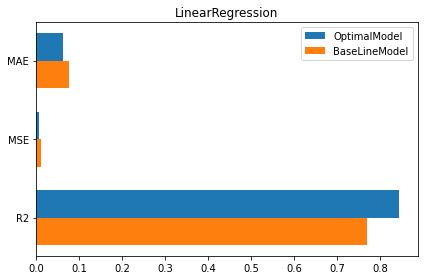

In [0]:
modelsReference('LinearRegression', BestModelsMetrics, BaseLineModelMetrics)

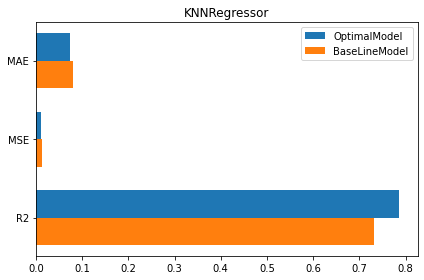

In [0]:
modelsReference('KNNRegressor', BestModelsMetrics, BaseLineModelMetrics)

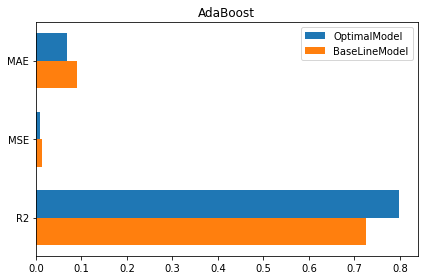

In [0]:
modelsReference('AdaBoost', BestModelsMetrics, BaseLineModelMetrics)

Оптимальные модели имеют лучшие показатели, в сравнении с базовыми. Необходимо выбрать наилучшую модель из оптимальных.

Достаточно сравнить одну из метрик каждой модели для того, чтобы определить наилучшую. Сравним среднее квадратическое отклонение ошибки.

In [0]:
data5 = pd.DataFrame(data=BestModelsMetrics)
# Use textposition='auto' for direct text
fig = go.Figure()
fig.add_trace(go.Bar(
            x=data5.columns, y=data5.loc['MSE'],
            text=data5.loc['MSE'],
            textposition='auto',
            name = 'MSE'
        ))
fig.show()

In [0]:
bestModels['LinearRegression']

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, random_state=None, solver='auto', tol=0.001)

**Вывод:Сравнение показало, что модель линейной регрессии с L2 регуляризацией лучше всего подходит для решения поставленной задачи. Гиперпараметр в оптимальной модели равен 0.1**